<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/miprimeraredneuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cargamos librerías a utilizar

In [ ]:

import numpy as np
from keras import layers,models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


### Cargar los datos y separarlos en entrenamiento y prueba

In [ ]:
(train_data,train_labels),(test_data, test_labels)=mnist.load_data()

In [ ]:
  train_data.shape

(60000, 28, 28)

Podemos ver que este dataset que cargamos corresponde a 60000 imagenes de 28 X 28

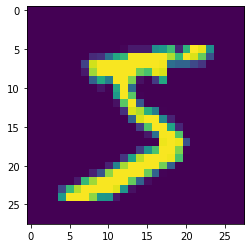

In [ ]:
plt.imshow(train_data[0])

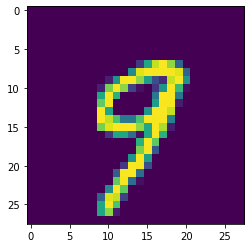

In [ ]:
plt.imshow(train_data[57])

In [ ]:
train_labels[57]

9

### Cargar y configurar el modelo de la red neuronal

In [ ]:
model=models.Sequential()
#Agregaremos al modelo una red de 512 neuronas con activación tipo relu
#cuya entrada será de tipo 28*28
model.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
#Agregamos otra capa de 10 neuronas porque esas van a ser nuestras posibles
#salidas, numeros del 0 al 9
model.add(layers.Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Realizar una limpieza a los datos para un mejor procesamiento

In [ ]:
x_train=train_data.reshape((60000,28*28))
x_train=x_train.astype("float32")/255

x_test=test_data.reshape((10000,28*28))
x_test=x_test.astype("float32")/255

In [ ]:
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
train_labels[0]

5

# Entrenamiento del modelo

In [ ]:
#Datos de entrenamiento, 5 interaciones y en grupos de 128 datos
model.fit(x_train,y_train, epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2647 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9884


Anteriormente podemos ver como va aumentando la accuracy de los datos

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9802


[0.06517685204744339, 0.9801999926567078]

Podemos ver que el modelo tuvo una precision del 98% 